<a href="https://colab.research.google.com/github/dhmodi/datascience/blob/master/RPM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import itertools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
%matplotlib inline
import nltk
nltk.download('all')
from keras.models import Sequential
from keras import layers
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

Using TensorFlow backend.


In [0]:
# Give the location of the file 
df = pd.read_excel('/content/Book1.xlsx', index_col=0)
rpm = df[['Notes','FC Snapshot Aggregate YTD']]
rpm['snapshot_rounded_off']= round(rpm['FC Snapshot Aggregate YTD'])
rpm.snapshot_rounded_off = rpm.snapshot_rounded_off.astype(int)
rpm['snapshot_notes'] = rpm['Notes'].values.astype('U')
rpm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

,Notes,FC Snapshot Aggregate YTD,snapshot_rounded_off,snapshot_notes
GE - Person ID,,,,
10000,Client - SD consultant. Chevron project and Su...,8.444,8,Client - SD consultant. Chevron project and Su...
10004,BCICM- Govt. of British Columbia\r\n==========...,10.000,10,BCICM- Govt. of British Columbia\r\n==========...
10005,Was on IAP came back brilliantly well from the...,10.000,10,Was on IAP came back brilliantly well from the...
10006,Has received consistent & positive feedback fr...,7.000,7,Has received consistent & positive feedback fr...
10007,WGS- Anthem is the one of the biggest engageme...,0.000,0,WGS- Anthem is the one of the biggest engageme...
10008,"#Name Removed is a key resource on ""EPDSV2"" p...",0.000,0,"#Name Removed is a key resource on ""EPDSV2"" p..."
10009,He was to be on project for short duration. He...,0.000,0,He was to be on project for short duration. He...
10010,strong technical performer. Managed multiple c...,10.000,10,strong technical performer. Managed multiple c...
10011,Strong Analytical skills and storyboarding ski...,9.667,10,Strong Analytical skills and storyboarding ski...


In [0]:
#Creating a function that I will use to clean review strings
#Function makes the string 'txt' lowercase, removes stopwords, finds the length, and pulls out only adjectives
#Returns a list of the length, cleaned txt, and only adjective txt
def cleanme(txt):
    sent = str(txt).lower()
    wrds = word_tokenize(sent)
    clwrds = [w for w in wrds if not w in stopwords.words('english')]
    ln = len(clwrds)
    pos = pd.DataFrame(pos_tag(wrds))
    pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))
    rt = [ln, " ".join(clwrds), pos]
    return(rt)

In [0]:
#Create a field that shows the length of each review
# tmp = list()
# for i in range(len(rpm)):
#     tmp.append(cleanme(rpm.iloc[i,:]['snapshot_notes']))
# tmp = pd.DataFrame(tmp)
# tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']

KeyboardInterrupt: ignored

In [0]:
# #Add calculated columns back to the dataset
# rpm = rpm.reset_index()
# rpm = pd.concat([rpm,tmp], axis=1)
# rpm.head()
# #rpm.snapshot_rounded_off.unique()

In [0]:
#Setting up the X and Y data, where X is the review text and Y is the rating
#Three different inputs will be used: original review text, cleaned review text, and only adjectives review text
x1 = rpm.snapshot_notes
# x2 = rpm.cleanrev
# x3 = rpm.adjreview
y = rpm.snapshot_rounded_off

In [0]:
#Creating a vectorizer to split the text into unigrams and bigrams
# vect = TfidfVectorizer(ngram_range = (1,3))
# x_vect1 = vect.fit_transform(x1)
# x_vect2 = vect.fit_transform(x2)
# x_vect3 = vect.fit_transform(x3)
# x_train, x_test, y_train, y_test = train_test_split(x_vect1, y, test_size=0.25, random_state = 10)

NameError: ignored

In [0]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print('Accuracy for data: {:.4f}'.format(score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Accuracy for data: 0.4311


In [0]:
input_dim = X_train.shape[1]  # Number of features
print(input_dim)
model = Sequential()
model.add(layers.Dense(1000, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))

23832


In [0]:
model.compile(loss='sparse_categorical_crossentropy', 
optimizer='adam', 
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              23833000  
_________________________________________________________________
dense_4 (Dense)              (None, 11)                11011     
Total params: 23,844,011
Trainable params: 23,844,011
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train,
epochs=100,
verbose=False,
validation_data=(X_test, y_test),
batch_size=1000)

In [0]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9903
Testing Accuracy:  0.4134


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

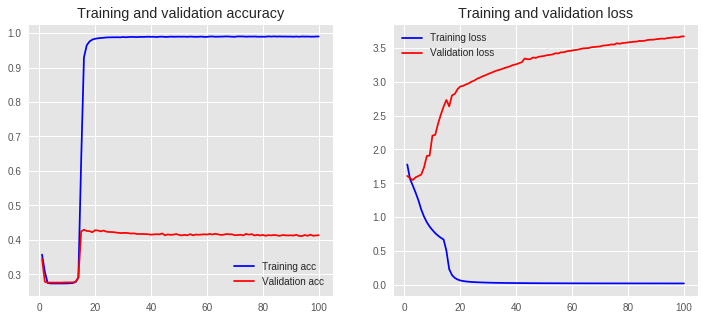

In [0]:
plot_history(history)

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [0]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[  10 2859  977    7    9   49    2  126    3  194    8    2   16    8
   20   63 1440    7    9  197   11  130    6    2  526 2463  106   26
   28 1339 1420   20 3985   11  354    3  520   10  105  109    5    2
 2226   27   20   11    7  341   10  179   57    4    2 1310  541  262
   18   53    6    2  183  262   14    7   46  341   10  179  326    3
    2  709    1 4325 1999 1637  122    7  129  303  370   38  190   22
    5   23  456  129   36   38 1357    4  300    1   49  538   13    2
   11  354]


In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           1385550   
_________________________________________________________________
flatten_3 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_10 (Dense)             (None, 11)                11011     
Total params: 6,397,561
Trainable params: 6,397,561
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.2685
Testing Accuracy:  0.2515


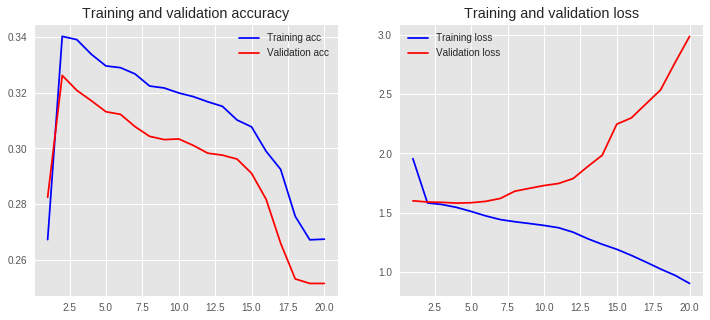

In [0]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           1385550   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              51000     
_________________________________________________________________
dense_12 (Dense)             (None, 11)                11011     
Total params: 1,447,561
Trainable params: 1,447,561
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Training Accuracy: 0.7655
Testing Accuracy:  0.4300


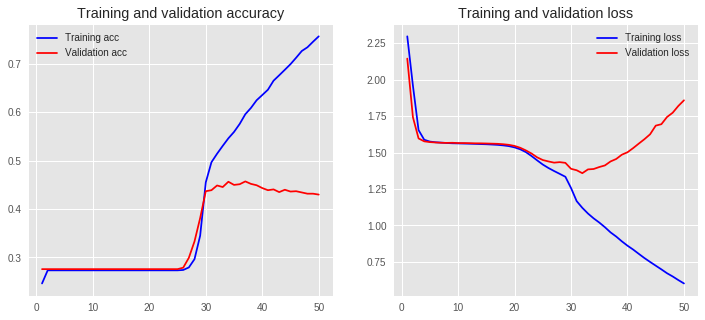

In [0]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [0]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    '/content/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [31]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.2964887589765797

In [32]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           1385550   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              51000     
_________________________________________________________________
dense_14 (Dense)             (None, 11)                11011     
Total params: 1,447,561
Trainable params: 62,011
Non-trainable params: 1,385,550
_________________________________________________________________


Training Accuracy: 0.3585
Testing Accuracy:  0.3436


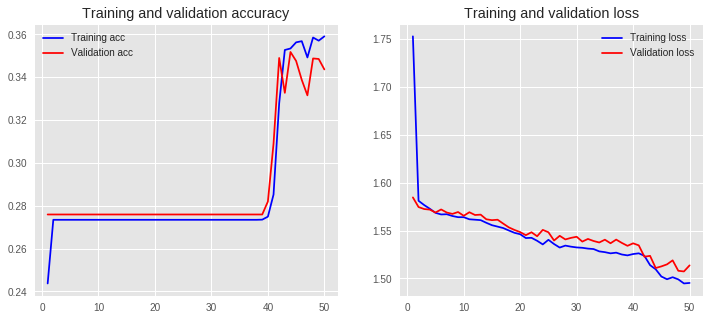

In [33]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [34]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           1385550   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              51000     
_________________________________________________________________
dense_16 (Dense)             (None, 11)                11011     
Total params: 1,447,561
Trainable params: 1,447,561
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.7828
Testing Accuracy:  0.3818


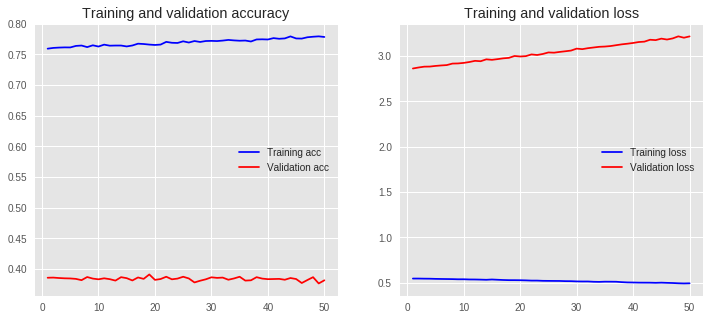

In [38]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [39]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          2771100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)              129000    
_________________________________________________________________
dense_18 (Dense)             (None, 11)                11011     
Total params: 2,975,239
Trainable params: 2,975,239
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.2752
Testing Accuracy:  0.2771


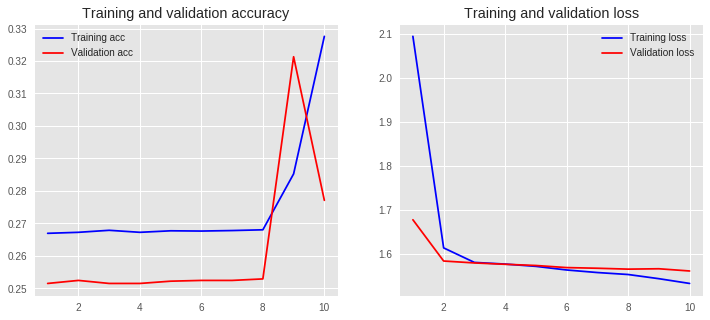

In [40]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=1000)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [0]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(11, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [0]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = '/content/output.txt'

sentences = rpm.snapshot_notes
y = rpm.snapshot_rounded_off

# Train-test split
sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
prompt = input(f'finished {source}; write to file and proceed? [y/n]')
if prompt.lower() not in {'y', 'true', 'yes'}:
    break
with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
         '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        source,
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
